analyze NCI cervical cnv results

In [1]:
# import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind
# import scipy.stats as stats
# import scipy.stats as ss
# from matplotlib import style
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)


# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_moamp import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# produce list of amplied and ampeted regions with oncogenes

In [298]:
def get_qvalue_cytoband(f):
    df = pd.read_csv(f, sep='\t')
#     df['num_genes'] = df['oncogenes'].apply(lambda x: x.split(')')[0].split('(')[1])
#     df['gene'] = df['oncogenes'].apply(lambda x: x.split(')')[1])
#     df = df[['q value','cytoband', 'num_genes', 'gene']].replace('', 'None')
#     df = df[df.gene != '']
#     s = df["gene"].str.split(',', expand=True).stack()
#     i = s.index.get_level_values(0)
#     df2 = df.loc[i].copy()
#     df2["gene"] = s.values
    return df

In [299]:
def map_two_columns(x1, x2):
    if 'q' in x1 or 'p' in x1:
        return x1
    elif 'q' in x2 or 'p' in x2:
        return x2
    else:
        return 'error'
    

In [506]:
# for dels
# pos_del_file = '/home/szong/bin/GISTIC_2_0_22/124_patient_adj_hiv_pos/del_genes.conf_99.txt.summary.sorted'
pos_del_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_pos/del_genes.conf_99.txt.summary.sorted'
pos_dels = get_qvalue_cytoband(pos_del_file)
pos_dels.columns = ['cytoband', 'q_value', 'residual_q_value', 'chrom', 'wide_peak_boundary',
       'genes_in_wide_peak', 'oncogenes', 'num_genes']
# pos_dels = pd.read_csv(pos_del_file, sep='\t')
pos_dels.head(2)

# neg_del_file = '/home/szong/bin/GISTIC_2_0_22/124_patient_adj_hiv_neg/del_genes.conf_99.txt.summary.sorted'
neg_del_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_neg/del_genes.conf_99.txt.summary.sorted'
neg_dels = get_qvalue_cytoband(neg_del_file)
neg_dels.columns = ['cytoband', 'q_value', 'residual_q_value', 'chrom', 'wide_peak_boundary',
       'genes_in_wide_peak', 'oncogenes', 'num_genes']
# neg_dels = pd.read_csv(neg_del_file, sep='\t')
neg_dels.head(2)

ndf = pd.merge(pos_dels, neg_dels, left_on='cytoband', right_on='cytoband', how='outer')#.fillna(1)
# ndf.columns = ['hiv+q', 'cytoband','hiv+num_genes', 'hiv+oncogenes', 'hiv-q', 'hiv-num_genes','hiv-oncogenes']
# ndf['cytoband'] = ndf.astype(str).apply(lambda x: map_two_columns(x1=x['cytoband_pos'], x2=x['cytoband_neg']), axis=1)

# ndf = ndf.drop(['cytoband_pos', 'cytoband_neg'], axis=1)
ndf.head(2)

,cytoband,q_value,residual_q_value,chrom,wide_peak_boundary,genes_in_wide_peak,oncogenes,num_genes
0,1p36.21,0.055942,0.108690,1,7908889-24527094,"RNF186,PRAMEF10,DFFA,SLC25A34,HNRNPCL1,C1QB,KL...","SDHB,PARK7,PLA2G2A,UBE4B,ERRFI1,EPHB2,RAP1GAP,...",243
1,1p36.33,0.000004,0.000011,1,10029-139436,"FAM138F,OR4F5,FAM138A,DDX11L1,WASH7P,hsa-mir-1...",NaN,6


,cytoband,q_value,residual_q_value,chrom,wide_peak_boundary,genes_in_wide_peak,oncogenes,num_genes
0,1p13.2,0.039246,0.044773,1,108505732-143166646,"KCNA10,ATXN7L2,CYB561D1,SYPL2,SPAG17,NOTCH2,KC...","NOTCH2,NRAS,RBM15,FAM46C,TRIM33,ATP1A1,GSTM1,R...",158
1,1p36.33,0.001157,0.002320,1,31710-138899,"FAM138F,OR4F5,FAM138A",NaN,3


,cytoband,q_value_x,residual_q_value_x,chrom_x,wide_peak_boundary_x,genes_in_wide_peak_x,oncogenes_x,num_genes_x,q_value_y,residual_q_value_y,chrom_y,wide_peak_boundary_y,genes_in_wide_peak_y,oncogenes_y,num_genes_y
0,1p36.21,0.055942,0.108690,1.0,7908889-24527094,"RNF186,PRAMEF10,DFFA,SLC25A34,HNRNPCL1,C1QB,KL...","SDHB,PARK7,PLA2G2A,UBE4B,ERRFI1,EPHB2,RAP1GAP,...",243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1p36.33,0.000004,0.000011,1.0,10029-139436,"FAM138F,OR4F5,FAM138A,DDX11L1,WASH7P,hsa-mir-1...",NaN,6.0,0.001157,0.00232,1.0,31710-138899,"FAM138F,OR4F5,FAM138A",NaN,3.0


In [507]:
# ndf[ndf.cytoband == '5p11']

In [508]:
new_cols = pd.Series(ndf.columns.tolist()).str.replace('_x', '_hiv+').str.replace('_y', '_hiv-')

In [509]:
ndf.columns = new_cols

In [510]:
ndf.head(2)

,cytoband,q_value_hiv+,residual_q_value_hiv+,chrom_hiv+,wide_peak_boundary_hiv+,genes_in_wide_peak_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,residual_q_value_hiv-,chrom_hiv-,wide_peak_boundary_hiv-,genes_in_wide_peak_hiv-,oncogenes_hiv-,num_genes_hiv-
0,1p36.21,0.055942,0.108690,1.0,7908889-24527094,"RNF186,PRAMEF10,DFFA,SLC25A34,HNRNPCL1,C1QB,KL...","SDHB,PARK7,PLA2G2A,UBE4B,ERRFI1,EPHB2,RAP1GAP,...",243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1p36.33,0.000004,0.000011,1.0,10029-139436,"FAM138F,OR4F5,FAM138A,DDX11L1,WASH7P,hsa-mir-1...",NaN,6.0,0.001157,0.00232,1.0,31710-138899,"FAM138F,OR4F5,FAM138A",NaN,3.0


In [511]:
# find duplicated cytobands
# pd.concat([g for _,g in ndf.groupby('cytoband') if len(g)>1])

In [512]:
ndf = ndf.drop_duplicates(subset='cytoband', keep='last')

In [513]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf.to_csv(of, sep='\t', index=False)

In [514]:
ndf.shape
ndf['cytoband'].nunique()

(50, 15)

50

In [515]:
# ndf = ndf.drop_duplicates(subset='cytoband', keep='last')
# ndf = ndf.fillna(1)

In [516]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    k = 0
    j = 0 
    for i, point in a.iterrows():
        _ = ax.text(point['x']+j, point['y']+k, str(point['val']))
#         k+=.2
#         j+=.2
    return a

In [523]:
ndf['q_value_hiv+'] = ndf['q_value_hiv+'].fillna(1)
ndf['q_value_hiv-'] = ndf['q_value_hiv-'].fillna(1)
ndf['num_genes_hiv+'] = ndf['num_genes_hiv+'].fillna(0).astype(int)
ndf['num_genes_hiv-'] = ndf['num_genes_hiv-'].fillna(0).astype(int)
ndf['oncogenes_hiv+'] = ndf['oncogenes_hiv+'].fillna('None')
ndf['oncogenes_hiv-'] = ndf['oncogenes_hiv-'].fillna('None')


In [524]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_gene_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf = pd.read_csv(of, sep='\t').fillna(1)
# ndf.head(2)

In [525]:
ndf['hiv+q(-log10)'] = -np.log10(ndf['q_value_hiv+'])
ndf['hiv-q(-log10)'] = -np.log10(ndf['q_value_hiv-'])

In [526]:
ndf.head(2)

ndf.shape

,cytoband,q_value_hiv+,residual_q_value_hiv+,chrom_hiv+,wide_peak_boundary_hiv+,genes_in_wide_peak_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,residual_q_value_hiv-,chrom_hiv-,wide_peak_boundary_hiv-,genes_in_wide_peak_hiv-,oncogenes_hiv-,num_genes_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1p36.21,0.055942,0.108690,1.0,7908889-24527094,"RNF186,PRAMEF10,DFFA,SLC25A34,HNRNPCL1,C1QB,KL...","SDHB,PARK7,PLA2G2A,UBE4B,ERRFI1,EPHB2,RAP1GAP,...",243,1.000000,NaN,NaN,NaN,NaN,None,0,1.252262,-0.000000
1,1p36.33,0.000004,0.000011,1.0,10029-139436,"FAM138F,OR4F5,FAM138A,DDX11L1,WASH7P,hsa-mir-1...",None,6,0.001157,0.00232,1.0,31710-138899,"FAM138F,OR4F5,FAM138A",None,3,5.447794,2.936817


(50, 17)

In [527]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_cytoband_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf.to_csv(of, sep='\t', index=False)

In [528]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_cytoband_labels.csv'
# points.sort_values(['x', 'y']).to_csv(of, sep='\t', index=False)
points = pd.read_csv(of, sep='\t')

Text(0.5,1,'GISTIC dels cytobands')

(-1, 23)

(-1, 23)

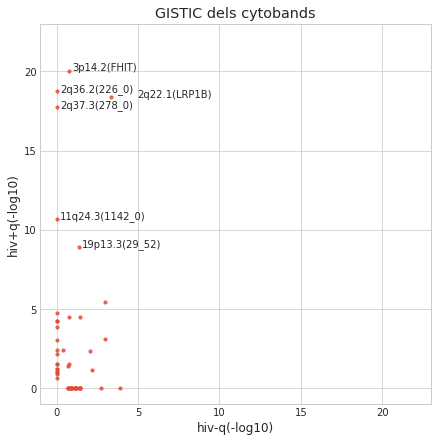

In [529]:
# Set theme
sns.set_style('whitegrid')


# Scatterplot arguments
# grid = sns.lmplot(x='hiv+q', y='hiv-q', data=ndf.fillna(.1),
#            fit_reg=False) # No regression line
#            #hue='Stage')   # Color by evolution stage
# # Tweak using Matplotlib
# # plt.ylim(0, .2)
# # plt.xlim(0, .2)
# grid.set(xscale="log", yscale="log")

f, ax = plt.subplots(figsize=(7, 7))


# ax.set(xscale="log", yscale="log")
sns.regplot(y='hiv+q(-log10)', x='hiv-q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,




ax.set_title('GISTIC dels cytobands')
ax.set_xlim(-1, 23)
ax.set_ylim(-1, 23)



    
ndf = ndf[(ndf['hiv+q(-log10)']>7)|(ndf['hiv-q(-log10)']>5)]
# points = label_point(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf['cytoband']+'('+ndf['num_genes_hiv+'].astype(str)+'_'+ndf['num_genes_hiv-'].astype(str)+')', plt.gca()) 
_ = label_point(points['x'], points['y'], points['val'], plt.gca()) 
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

In [496]:
points

,val,x,y
3,2q22.1(1.0_1.0),3.337431,18.371499
4,2q36.2(226.0_0.0),-0.000000,18.745742
5,2q37.3(278.0_0.0),-0.000000,17.731633
6,3p14.2(1.0_1.0),0.729787,20.037276
15,11q24.3(1142.0_0.0),-0.000000,10.684849
24,19p13.3(29.0_52.0),1.353655,8.945617
